# Linear Regression

Linear Regression is one of the most fundamental algorithms in the Machine Learning world. It is the door to the magical world ahead.
But before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model.
Gathering Data,
Data preparation,
Data Wrangling,
Analyse Data,
Train the model,
Test the model,
Deployment.

## What is Regression Analysis?

Regression in statistics is the process of predicting a Label(or Dependent Variable) based on the features(Independent Variables) at hand. Regression is used for time series modelling and finding the causal effect relationship between the variables and forecasting. For example, the relationship between the stock prices of the company and various factors like customer reputation and company annual performance etc. can be studied using regression.


Regression analysis is an important tool for analysing and modelling data. Here, we fit a curve/line to the data points, in such a manner that the differences between the distance of the actual data points from the plotted curve/line is minimum. The topic will be explained in detail in the coming sections.


## The use of Regression

Regression analyses the relationship between two or more features. Let’s take an example:

Let’s suppose we want to make an application which predicts the chances of admission a student to a foreign university. In that case, the 

The benefits of using Regression analysis are as follows:

   * It shows the significant relationships between the Lable (dependent variable) and the features(independent variable).
   * It shows the extent of the impact of multiple independent variables on the dependent variable.
   *  It can also measure these effects even if the variables are on a different scale.

These features enable the data scientists to find the best set of independent variables for predictions.


## Linear Regression

Linear Regression is one of the most fundamental and widely known Machine Learning Algorithms which people start with. Building blocks of a Linear Regression Model are:
* Discreet/continuous independent variables
* A best-fit regression line
* Continuous dependent variable.
i.e., A Linear Regression model predicts the dependent variable using a regression line based on the independent variables.
The equation of the Linear Regression is:

                                                Y=a+b*X + e 

 Where,
 a is the intercept, 
b is the slope of the line, 
and e is the error term. 
The equation above is used to predict the value of the target variable based on the given predictor variable(s).


### Regularization 
When we use regression models to train some data, there is a good chance that the model will overfit the given training data set.  Regularization helps sort this overfitting problem by restricting the degrees of freedom of a given equation i.e. simply reducing the number of degrees of a polynomial function by reducing their corresponding weights.  
In a linear equation, we do not want huge weights/coefficients as a small change in weight can make a large difference for the dependent variable (Y). So, regularization constraints the weights of such features to avoid overfitting. Simple linear regression is given as:

$y = \beta_0 + \beta_1x1+ \beta_2x2 +\beta_3x3+...+\beta_PxP$

Using the OLS method, we try to minimize the cost function given as:

<img src="images/RSS_reg.PNG" width="300">

To regularize the model, a Shrinkage penalty is added to the cost function.
Let’s see different types of regularizations in regression:


#### LASSO(Least Absolute Shrinkage and Selection Operator) Regression (L1 Form)
LASSO regression penalizes the model based on the sum of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j| $

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

<img src="images/L1.PNG" width="300">

#### Ridge Regression (L2 Form)
Ridge regression penalizes the model based on the sum of squares of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j ^ 2| $

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

<img src="images/ridge.PNG" width="300">

This value of lambda can be anything and should be calculated by cross validation as to what suits the model.

Let’s consider $\beta_1$ and $\beta_2$ be coefficients of a linear regression and λ = 1:

For Lasso, $\beta_1$ + $\beta_2$ <= s  

For Ridge, $\beta_1^2$ + $\beta_2^2$  <= s  

Where s is the maximum value the equations can achieve
.
If we plot both the above equations, we get the following graph:

<img src="images/ridge_vs_lasso.PNG" width="300">

The red ellipse represents the cost function of the model, whereas the square (left side) represents the Lasso regression and the circle (right side) represents the Ridge regression.


##### Difference between Ridge and Lasso
Ridge regression shrinks the coefficients for those predictors which contribute very less in the model but have huge weights, very close to zero. But it never makes them exactly zero. Thus, the final model will still contain all those predictors, though with less weights. This doesn’t help in interpreting the model very well. This is where Lasso regression differs with Ridge regression. In Lasso, the L1 penalty does reduce some coefficients exactly to zero when we use a sufficiently large tuning parameter λ. So, in addition to regularizing, lasso also performs feature selection.


##### Why use Regularization?
Regularization helps to reduce the variance of the model, without a substantial increase in the bias. If there is variance in the model that means that the model won’t fit well for dataset different that training data. The tuning parameter λ controls this bias and variance tradeoff. When the value of λ is increased up to a certain limit, it reduces the variance without losing any important properties in the data. But after a certain limit, the model will start losing some important properties which will increase the bias in the data. Thus, the selection of good value of λ is the key.
The value of λ is selected using cross-validation methods. A set of λ is selected and cross-validation error is calculated for each value of λ and that value of λ is selected for which the cross-validation error is minimum.


##### Elastic Net

According to the Hands-on Machine Learning book, elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio α. 

<img src="images/elasticNet.PNG" width="300">
where α is the mixing parameter between ridge (α = 0) and lasso (α = 1).


**When should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net?**

According to the Hands-on Machine Learning book, it is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.

No let's see the Python Implementation of these concepts:


In [6]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [8]:
data =pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [9]:
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [11]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now the data looks good and there are no missing values. Also, the first cloumn is just serial numbers, so we don' need that column. Let's drop it from data and make it more clean.

In [12]:
data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


Let's visualize the data and analyze the relationship between independent and dependent variables:

C:\Users\Ayush Jain\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ayush Jain\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ayush Jain\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

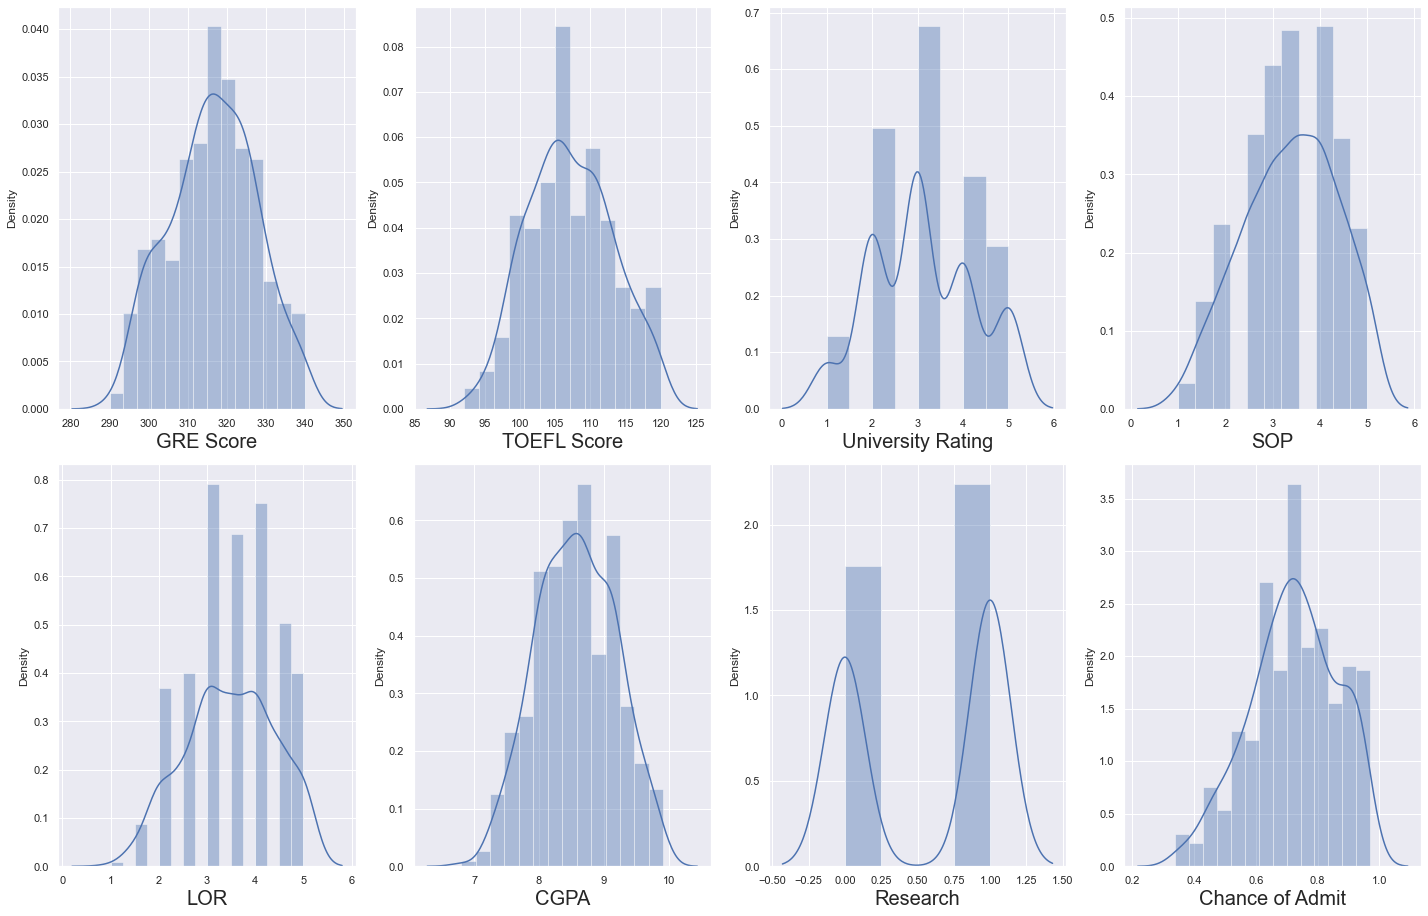

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

Let's observe the relationship between independent variables and dependent variable.


In [14]:
y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])

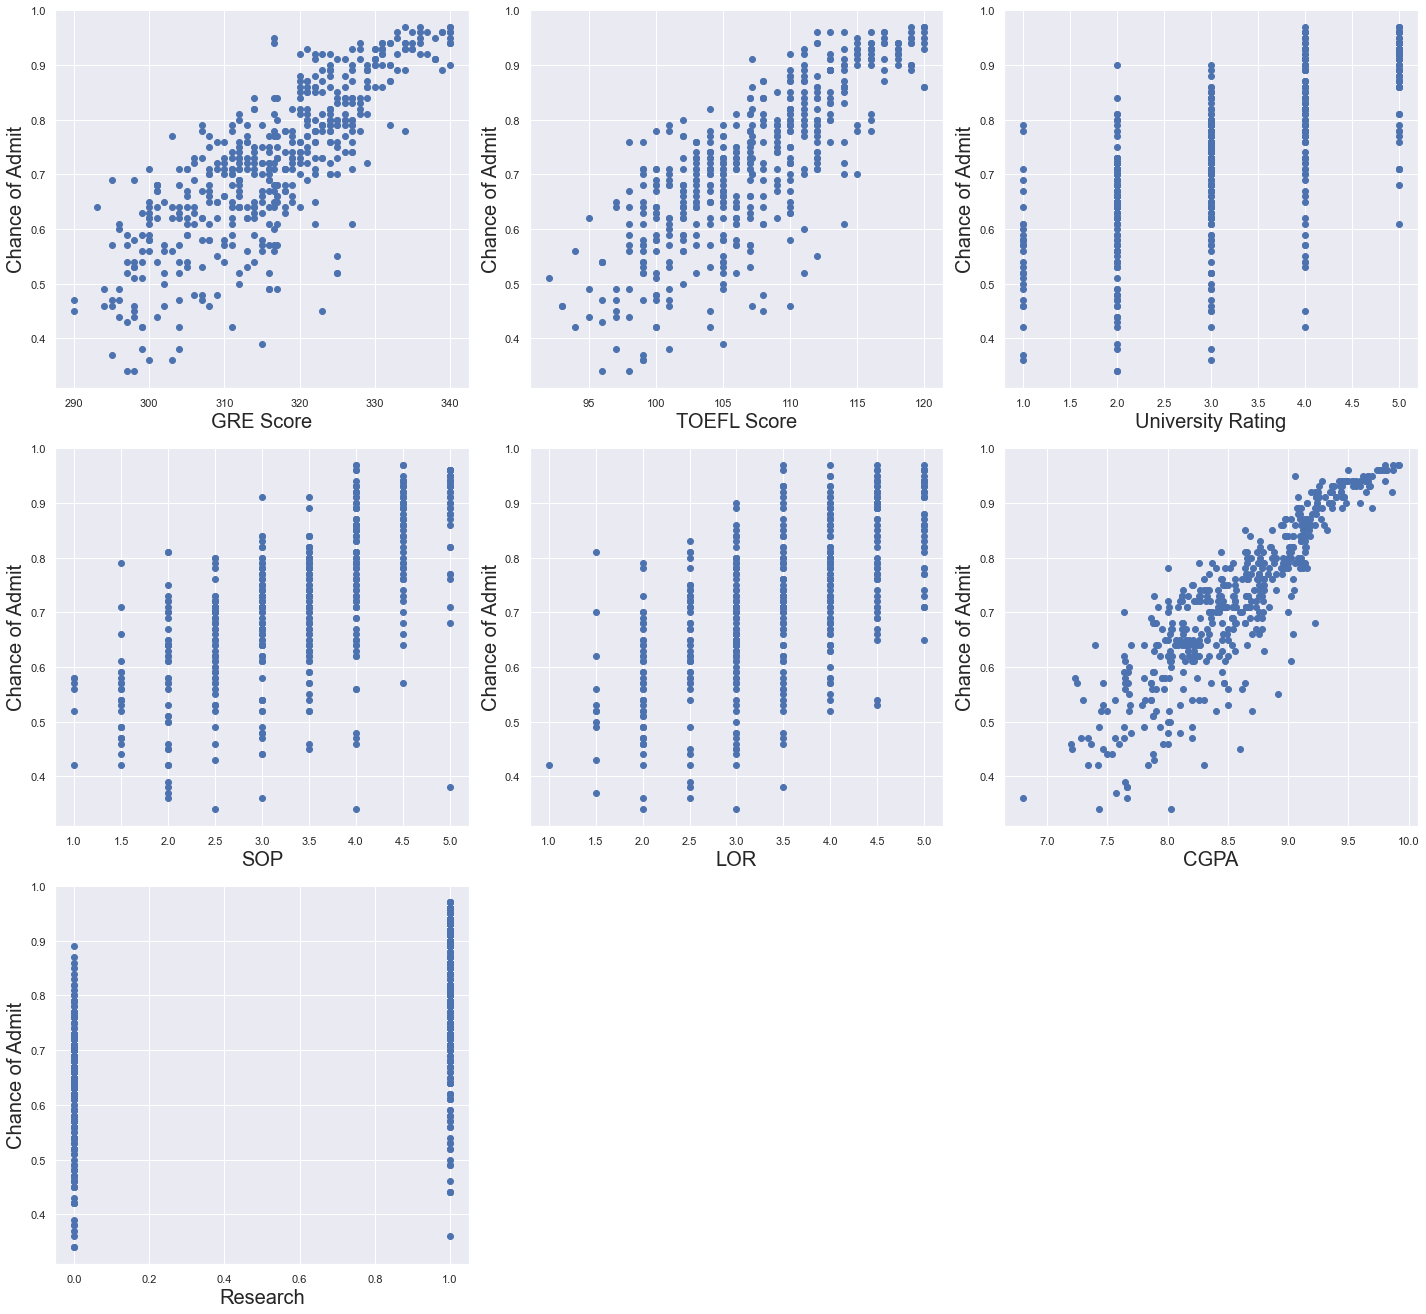

In [15]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

Let's move ahead and check for multicollinearity.

In [16]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [18]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go. 

Great. Let's go ahead and use linear regression and see how good it fits our data.
But first. let's split our data in train and test.

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [20]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

In [21]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [39]:
import pickle

In [40]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [ ]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

In [ ]:
regression.score(x_train,y_train)

0.8415250484247909

In [23]:
adj_r2(x_train,y_train)

0.8385023654247188

Our r2 score is 84.15% and adj r2 is 83.85% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization.

In [24]:
regression.score(x_test,y_test)

0.7534898831471067

In [25]:
adj_r2(x_test,y_test)

0.7387414146174465

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

In [26]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

C:\Users\Ayush Jain\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=100000, normalize=True)

In [27]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

3.0341655445178153e-05

In [28]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05)

In [29]:
lasso_reg.score(x_test, y_test)

0.7534654960492284

our r2_score for test data (75.34%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [30]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

C:\Users\Ayush Jain\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Ayush Jain\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a 

RidgeCV(alphas=array([8.51092777, 0.93369779, 8.17922489, 9.19904308, 6.74470595,
       1.90518652, 3.86434878, 8.43864835, 5.398924  , 2.88544352,
       0.84675679, 9.41858876, 0.91301632, 0.43535491, 0.80915543,
       6.03715266, 8.47410048, 0.39480162, 0.70705919, 5.61837912,
       1.42173577, 7.01737278, 7.6685136 , 0.0766296 , 8.74762608,
       6.78962139, 8.17943849, 9.09444136, 3.94062473, 4.44927829,
       0.6236662 , 9.62932529, 0.05973742, 4.56649799, 4.72338624,
       8.96683633, 0.52351447, 7.75205983, 6.01208263, 8.32107046,
       8.3620509 , 8.37505004, 6.42459412, 8.67382481, 9.51608255,
       1.70115894, 7.26029761, 1.81327282, 7.00414769, 6.35325721]),
        cv=10, normalize=True)

In [31]:
ridgecv.alpha_

0.0597374227199432

In [32]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.0597374227199432)

In [33]:
ridge_model.score(x_test, y_test)

0.7535191846139065

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [34]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [35]:
elasticCV.alpha_

0.0011069728449315508

In [36]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [37]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508)

In [38]:
elasticnet_reg.score(x_test, y_test)

0.7531695370639867

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.